In [ ]:
import numpy as no
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.9 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [ ]:
from pyomo.environ import *

**1. Help the manager of Luitporiya Company in his scheduling problem by formulating and solving the problem
using :**

**(a) Integer Programming formulation and solver. Clearly describe the formulation with explicitly listing the
variables, objective function and constraints**

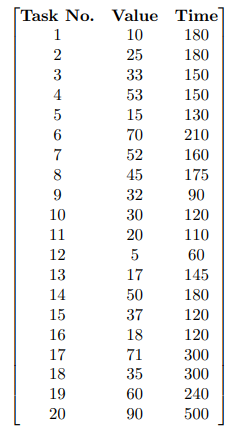

Let $x_i$ = 1 , if $i^{th}$ task is fitted within the n 40 hours week window
else $x_i = 0$

Let **$v_i$** be the **value** of the $i^{th}$ task and **$w_i$** be the **time taken** of the $i^{th}$ task

\begin{aligned}
& \text{Maximize} && \sum_{i=1}^{n} v_i \cdot x_i \\
& \text{subject to} && \sum_{i=1}^{n} w_i \cdot x_i \leq 2400 \\
& \text{where} && x_i \in \{0, 1\} \text{ for all } i = 1, 2, \ldots, n
\end{aligned}


In [ ]:
tasks = [
    (1, 10, 180),
    (2, 25, 180),
    (3, 33, 150),
    (4, 53, 150),
    (5, 15, 130),
    (6, 70, 210),
    (7, 52, 160),
    (8, 45, 175),
    (9, 32, 90),
    (10, 30, 120),
    (11, 20, 110),
    (12, 5, 60),
    (13, 17, 145),
    (14, 50, 180),
    (15, 37, 120),
    (16, 18, 120),
    (17, 71, 300),
    (18, 35, 300),
    (19, 60, 240),
    (20, 90, 500)
]

In [ ]:
task_no = []
values = []
time = []

for task in tasks:
  task_no.append(task[0])
  values.append(task[1])
  time.append(task[2])

In [ ]:
values

[10, 25, 33, 53, 15, 70, 52, 45, 32, 30, 20, 5, 17, 50, 37, 18, 71, 35, 60, 90]

In [ ]:
model = ConcreteModel()
model.y = Var(range(20), domain = Binary)
model.obj = Objective(expr = sum(model.y[i]*values[i] for i in range(20)), sense = maximize)

model.constraints = ConstraintList()

for i in range(20):
  model.constraints.add(expr = sum(model.y[i]*time[i] for i in range(20)) <= 2400)

result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)

In [ ]:
model.obj()

623.0

In [ ]:
print('Decision Variables for our model : ')
for i in range(20):
    print(f'x{i} : ', model.y[i].value)

Decision Variables for our model : 
x0 :  0.0
x1 :  0.0
x2 :  1.0
x3 :  1.0
x4 :  0.0
x5 :  1.0
x6 :  1.0
x7 :  1.0
x8 :  1.0
x9 :  1.0
x10 :  0.0
x11 :  0.0
x12 :  0.0
x13 :  1.0
x14 :  1.0
x15 :  0.0
x16 :  1.0
x17 :  0.0
x18 :  1.0
x19 :  1.0


**Tasks included in the schedule: 3 ,4 ,6 ,7 ,8 ,9 ,10 ,14 ,15 ,17 ,19 ,20**

**(b) Implementing Recursion based Programming. Clearly describe your logic. Your answer should give the
optimal objective funstion as well the the variables**

In [ ]:
def schedule_tasks_recursive(tasks, n, max_time, task_indices=[], max_value=0, current_time=0):
    # Base case: if all tasks are processed or no more time available
    s
    if n == 0 or current_time >= max_time:
        # Calculate the total value of selected tasks
        total_value = sum(tasks[i][1] for i in task_indices)
        # Return the total value and the selected task indices
        return total_value, task_indices

    # If including the current task exceeds the time limit, skip it
    if current_time + tasks[n - 1][2] > max_time:
        return schedule_tasks_recursive(tasks, n - 1, max_time, task_indices, max_value, current_time)

    # Check if the current task should be included or excluded
    incl_value, incl_indices = schedule_tasks_recursive(tasks, n - 1, max_time, task_indices + [n - 1], max_value, current_time + tasks[n - 1][2])
    excl_value, excl_indices = schedule_tasks_recursive(tasks, n - 1, max_time, task_indices, max_value, current_time)

    # Return the maximum value and corresponding task indices
    if incl_value > excl_value:
        return incl_value, incl_indices
    else:
        return excl_value, excl_indices

# Tasks table: [Task No., Value, Time]
tasks = [
    [1, 10, 180], [2, 25, 180], [3, 33, 150], [4, 53, 150], [5, 15, 130],
    [6, 70, 210], [7, 52, 160], [8, 45, 175], [9, 32, 90], [10, 30, 120],
    [11, 20, 110], [12, 5, 60], [13, 17, 145], [14, 50, 180], [15, 37, 120],
    [16, 18, 120], [17, 71, 300], [18, 35, 300], [19, 60, 240], [20, 90, 500]
]

max_time = 2400
max_value, optimal_task_indices = schedule_tasks_recursive(tasks, len(tasks), max_time)

# Print the results
print("Optimal Task Schedule:")
for idx in optimal_task_indices:
    print(f"Task {tasks[idx][0]} (Value: {tasks[idx][1]}, Time: {tasks[idx][2]})")

print("Total Value:", max_value)


Optimal Task Schedule:
Task 20 (Value: 90, Time: 500)
Task 19 (Value: 60, Time: 240)
Task 17 (Value: 71, Time: 300)
Task 15 (Value: 37, Time: 120)
Task 14 (Value: 50, Time: 180)
Task 10 (Value: 30, Time: 120)
Task 9 (Value: 32, Time: 90)
Task 8 (Value: 45, Time: 175)
Task 7 (Value: 52, Time: 160)
Task 6 (Value: 70, Time: 210)
Task 4 (Value: 53, Time: 150)
Task 3 (Value: 33, Time: 150)
Total Value: 623


**(c) Implementing Dynamic Programming. Clearly describe your logic. Your answer should give the optimal
objective function as well the the variables.**

In [ ]:
def schedule_tasks_dp(tasks, max_time):
    n = len(tasks)
    # Create a 2D table to store the results of subproblems
    dp = [[0] * (max_time + 1) for _ in range(n + 1)]
    # Fill the dp table
    for i in range(1, n + 1):
        for j in range(1, max_time + 1):
            # If the current task's time exceeds the available time, skip it
            if tasks[i - 1][2] > j:
                dp[i][j] = dp[i - 1][j]
            else:
                # Check if including the current task would give a higher value
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - tasks[i - 1][2]] + tasks[i - 1][1])

    # Trace back to find the tasks included in the schedule
    selected_tasks = []
    i, j = n, max_time
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            selected_tasks.append(tasks[i - 1][0])
            j -= tasks[i - 1][2]
        i -= 1
    # Return the maximum value and the selected tasks
    return dp[n][max_time], selected_tasks

# Tasks table: [Task No., Value, Time]
tasks = [
    [1, 10, 180], [2, 25, 180], [3, 33, 150], [4, 53, 150], [5, 15, 130],
    [6, 70, 210], [7, 52, 160], [8, 45, 175], [9, 32, 90], [10, 30, 120],
    [11, 20, 110], [12, 5, 60], [13, 17, 145], [14, 50, 180], [15, 37, 120],
    [16, 18, 120], [17, 71, 300], [18, 35, 300], [19, 60, 240], [20, 90, 500]
]

max_time = 2400
max_value, optimal_task_indices = schedule_tasks_dp(tasks, max_time)

# Print the results
print("Optimal Task Schedule:")
for task_no in optimal_task_indices:
    print(f"Task {task_no}")

print("Total Value:", max_value)


Optimal Task Schedule:
Task 20
Task 19
Task 17
Task 15
Task 14
Task 10
Task 9
Task 8
Task 7
Task 6
Task 4
Task 3
Total Value: 623


**2. Suppose the manager decides it will do the most valuable tasks first. So he selects his most valuable tasks till
the time constraint is fulfilled. Will the optimal solution remain same as 1.2? Show by implementation of this
greedy algorithm.**

In [ ]:
tasks = [
    [1, 10, 180], [2, 25, 180], [3, 33, 150], [4, 53, 150], [5, 15, 130],
    [6, 70, 210], [7, 52, 160], [8, 45, 175], [9, 32, 90], [10, 30, 120],
    [11, 20, 110], [12, 5, 60], [13, 17, 145], [14, 50, 180], [15, 37, 120],
    [16, 18, 120], [17, 71, 300], [18, 35, 300], [19, 60, 240], [20, 90, 500]]

In [ ]:
def greedy_algorithm(capacity, costs, values, n):
    max_profit = 0
    selected_items = []

    # Iterate while there's still capacity in the knapsack
    while capacity > 0:
        max_value = 0
        max_index = -1

        # Find the item with the maximum value
        for i in range(n):
          if (i not in selected_items):
            if costs[i] <= capacity and values[i] > max_value:
                max_value = values[i]
                max_index = i

        if max_index == -1:
            break

        max_profit += max_value
        capacity -= costs[max_index]
        selected_items.append(max_index)


    #sorting items
    selected_items.sort()
    for i in range(len(selected_items)):
      selected_items[i] += 1
    return max_profit, selected_items

In [ ]:
max_value1, selected_tasks1 = greedy_algorithm(2400,time,values,len(time))
print("Optimal Task Schedule:")
for task_no in selected_tasks1:
    print(f"Task {task_no}")

print("Total Value:", max_value1)

Optimal Task Schedule:
Task 4
Task 6
Task 7
Task 8
Task 12
Task 14
Task 15
Task 17
Task 18
Task 19
Task 20
Total Value: 568


**3. Suppose the manager chooses first n tasks which have the better value by time ratio while maintaining feasibility
of 40 hours. Will the optimal solution remain same as 1.2? Show by implementation of this greedy algorithm.**

In [ ]:
def greedy_algorithm_ratio(capacity,costs,values, n):
    # Calculate value per unit weight for each item
    value_per_weight = [(values[i] / costs[i], i) for i in range(n)]
    # Sort items based on valueue per unit weight in descending order
    value_per_weight.sort(reverse=True, key=lambda x: x[0])

    max_profit = 0
    selected_items = []

    for ratio, index in value_per_weight:
        if capacity >= costs[index]:
            max_profit += values[index]
            capacity -= costs[index]
            selected_items.append(index)

    for i in range(len(selected_items)):
      selected_items[i] += 1
    return max_profit, selected_items

In [ ]:
max_value, selected_tasks = greedy_algorithm_ratio(2400,time,values,len(time))

print("Optimal Task Schedule:")
for task_no in selected_tasks:
    print(f"Task {task_no}")

print("Total Value:", max_value)

Optimal Task Schedule:
Task 9
Task 4
Task 6
Task 7
Task 15
Task 14
Task 8
Task 10
Task 19
Task 17
Task 3
Task 11
Task 16
Task 2
Task 12
Total Value: 601


**Question 4**

 Given that set  K is a set cover and set **KC** is the minimal set cover, let's delve into the relationship between **K** and **KC** based on their definitions:

- Set **K** as a set cover is defined as:
  $ K := \{ x \in \{0, 1\}^n : \sum_{i=1}^{n} a_i x_i \leq b \} \$

- Set **KC** as the minimal set cover is defined as:
  $[ KC := \{ x \in \{0, 1\}^n : \sum_{i \in C} x_i \leq |C| - 1, \text{ for every minimal cover } C \text{ in } K \} $

Given the nature of set covers and minimal set covers, we can analyze their relationship as follows:

1. $ K \subseteq KC $: In this scenario, every set cover in **K** is also a minimal cover in **KC**. This implies that all the constraints of a set cover in **K** automatically satisfy the conditions for a minimal set cover in **KC**.

2. $ KC \nsubseteq K $: The minimal set covers in ** KC ** do not necessarily form a subset of the set covers in ** K **. This is because the requirements for being a minimal set cover, as defined in ** KC **, might not align with the constraints of a general set cover in ** K **.

Therefore, based on the definitions provided and the nature of set covers and minimal set covers, we can conclude that $ K \subseteq KC$ **while** $KC \nsubseteq K $. This relationship highlights the distinction between set covers and minimal set covers in this context.  